<a href="https://colab.research.google.com/github/yisuuum/practice/blob/main/Credit_card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 의사결정나무란?**

**의사결정나무(Decision Tree)**

의사결정나무는 데이터를 나무 구조로 도표화시켜 분석하는 방법으로, 데이터가 가진 속성들로부터 분류 기준 속성을 판별하고, 분류 기준 속성에 따라 모델링하는 분류, 예측 모형입니다.

- 목표변수가 이상형인 경우 -> <font color='red'>분류나무(Classification tree)</font>
- 목표변수가 연속형인 경우 -> <font color='red'>회귀나무(Regression tree)</font>

**의사결정나무의 구성요소**

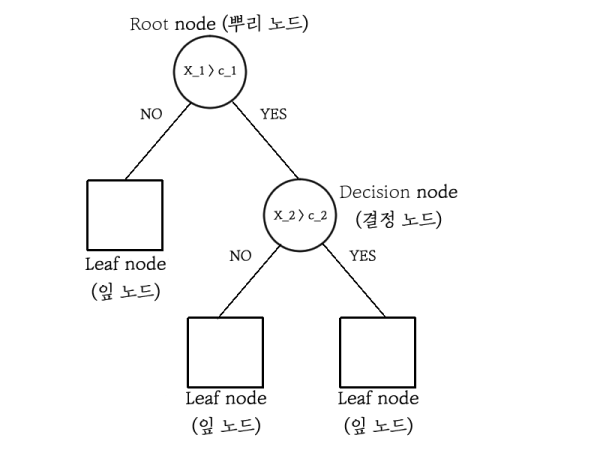

- 뿌리 노드(Root node) : 의사결정나무의 시작점, <u>가장 중요한 분류 규칙</u>.
- 분할, 분리(splitting) : 의사결정나무의 분류 규칙에 의해 가지가 두 개 혹은 여러 개로 나눠지는 것.
- 결정 노드(Decision node) : 규칙이 되는 조건.
- 잎 노드(Leaf node) : 결정된 분류 값.
- 부모 노드(Parent node) : 분류되기 전 마디
- 자식 노드(Child node) : 분류된 후 노드들


**분류 기준(splitting Criterion)**

분류 기준이란, 부모노드에서 자식노드로 분류될 때, 어떤 독립변수를 이용하여 어떻게 범주를 구분하여 설정하는 것이 종속변수 분포를 잘 구분할 수 있는지를 결정하는 기준입니다.

**정지규칙(Stopping Rule) 및 가지치기(Pruning)**

의사결정나무의 분류기준이 많아질수록 그래프는 복잡해지며 <u>과적합(overfitting)</u> 문제가 발생할 수 있습니다. 따라서 과적합을 줄이기 위해 초기에 트리를 키우는 단계에서 정지규칙을 적용하고, 최대 트리를 적절하게 가지치기하여 예측력이 좋은 분류 규칙을 도출합니다.

- 정지규칙(Stopping Rule) : 더 이상 분리가 되지 않는 경우 끝낼 수 있는 규칙. (ex - 더 이상 불순도가 떨어지지 않는 경우에 끝낸다, 자식 노드에 남은 샘플의 수가 적은 경우에 끝낸다.)
- 가지치기(Pruning) : 적절하지 않은 불필요한 마디를 제거.

# **2. 라이브러리**

**필요한 라이브러리 설치**

In [1]:
install.packages("dplyr")
install.packages("rpart")
install.packages("rpart.plot")
install.packages("caret")
install.packages("e1071")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**라이브러리 불러오기**

In [2]:
library("dplyr")
library("rpart")
library("rpart.plot")
library("caret")
library("e1071")
library("ggplot2")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lattice

Loading required package: ggplot2

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


# **3. creditcard 데이터 살펴보기**

분석에서 사용할 데이터는 캐글(kaggle)의 Credit Card Fraud Detection 데이터입니다.


데이터 출처 : [Credit Card Fraud Detection ](https://www.kaggle.com/mlg-ulb/creditcardfraud)

#### **데이터 불러오기**

In [11]:
data <- read.csv("sample_data/creditcard.csv", sep = ",", header = TRUE)

구글 드라이브에 저장된 파일을 불러와 분석할 수 있는 파이썬과 달리, Colab에서 R을 사용할 경우 구글 드라이브에 저장된 파일을 불러오는 방법을 찾을 수가 없었습니다. 그래서 Colab의 sample_data 폴더에 분석하고 싶은 csv 파일을 저장하고 sample_data 경로를 사용하는 방식으로 데이터를 불러왔습니다.

#### **데이터 탐색 및 전처리**

**데이터 확인**

In [12]:
colnames(data) #데이터의 칼럼 확인

[1] "Time"   "V1"     "V2"     "V3"     "V4"     "V5"     "V6"     "V7"    
 [9] "V8"     "V9"     "V10"    "V11"    "V12"    "V13"    "V14"    "V15"   
[17] "V16"    "V17"    "V18"    "V19"    "V20"    "V21"    "V22"    "V23"   
[25] "V24"    "V25"    "V26"    "V27"    "V28"    "Amount" "Class"

데이터의 칼럼(특성)을 확인해본 결과, 각 칼럼이 무엇을 의미하는지 나와있지 않고, 대신 V1, V2, ..., V28로 대체되어 있음을 확인할 수 있습니다. 아마 신용카드 데이터의 특성상 개인적인 정보가 노출되지 않도록 하기 위해서인 것 같습니다.

캐글에서 creditcard 데이터셋에 대한 설명을 살펴보면 다음과 같습니다.
- Time : Number of seconds elapsed between this transaction and the first transaction in the dataset
- V1 ~ V28 : may be result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)
- Amount : Transaction amount
- Class : 1 for fraudulent transactions, 0 otherwise



In [13]:
head(data) #상위 몇 개의 행 확인
tail(data) #하위 몇 개의 행 확인

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,⋯,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
2,0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,⋯,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
3,1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,⋯,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
4,1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,⋯,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
5,2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,⋯,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
6,2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,⋯,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
284802,172785,0.1203164,0.93100513,-0.5460121,-0.7450968,1.13031398,-0.2359732,0.8127221,0.1150929,-0.2040635,⋯,-0.3142046,-0.8085204,0.05034266,0.102799590,-0.4358701,0.1240789,0.217939865,0.06880333,2.69,0
284803,172786,-11.8811179,10.07178497,-9.8347835,-2.0666557,-5.36447278,-2.6068373,-4.9182154,7.3053340,1.9144283,⋯,0.2134541,0.1118637,1.01447990,-0.509348453,1.4368069,0.2500343,0.943651172,0.82373096,0.77,0
284804,172787,-0.7327887,-0.05508049,2.0350297,-0.7385886,0.86822940,1.0584153,0.0243297,0.2948687,0.5848000,⋯,0.2142053,0.9243836,0.01246304,-1.016225669,-0.6066240,-0.3952551,0.068472470,-0.05352739,24.79,0
284805,172788,1.9195650,-0.30125385,-3.2496398,-0.5578281,2.63051512,3.0312601,-0.2968265,0.7084172,0.4324540,⋯,0.2320450,0.5782290,-0.03750086,0.640133881,0.2657455,-0.0873706,0.004454772,-0.02656083,67.88,0
284806,172788,-0.2404400,0.53048251,0.7025102,0.6897992,-0.37796113,0.6237077,-0.6861800,0.6791455,0.3920867,⋯,0.2652449,0.8000487,-0.16329794,0.123205244,-0.5691589,0.5466685,0.108820735,0.10453282,10.00,0
284807,172792,-0.5334125,-0.18973334,0.7033374,-0.5062712,-0.01254568,-0.6496167,1.5770063,-0.4146504,0.4861795,⋯,0.2610573,0.6430784,0.37677701,0.008797379,-0.4736487,-0.8182671,-0.002415309,0.01364891,217.00,0


In [14]:
str(data) #데이터 구조 확인

'data.frame':	284807 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V

In [15]:
summary(data) #데이터 분포 확인

      Time              V1                  V2                  V3          
 Min.   :     0   Min.   :-56.40751   Min.   :-72.71573   Min.   :-48.3256  
 1st Qu.: 54202   1st Qu.: -0.92037   1st Qu.: -0.59855   1st Qu.: -0.8904  
 Median : 84692   Median :  0.01811   Median :  0.06549   Median :  0.1799  
 Mean   : 94814   Mean   :  0.00000   Mean   :  0.00000   Mean   :  0.0000  
 3rd Qu.:139320   3rd Qu.:  1.31564   3rd Qu.:  0.80372   3rd Qu.:  1.0272  
 Max.   :172792   Max.   :  2.45493   Max.   : 22.05773   Max.   :  9.3826  
       V4                 V5                   V6                 V7          
 Min.   :-5.68317   Min.   :-113.74331   Min.   :-26.1605   Min.   :-43.5572  
 1st Qu.:-0.84864   1st Qu.:  -0.69160   1st Qu.: -0.7683   1st Qu.: -0.5541  
 Median :-0.01985   Median :  -0.05434   Median : -0.2742   Median :  0.0401  
 Mean   : 0.00000   Mean   :   0.00000   Mean   :  0.0000   Mean   :  0.0000  
 3rd Qu.: 0.74334   3rd Qu.:   0.61193   3rd Qu.:  0.3986   3rd Qu

In [16]:
table(is.na(data)) #결측값 확인


  FALSE 
8829017 

**Class 변수 범주형 변환**

Class 칼럼은 신용카드의 부정사용 유무를 나타내고 있습니다. 문제없이 카드를 사용한 사람은 0, 부정 사용한 사람은 1로 표기되어 있으므로, 이 칼럼을 범주형으로 변환시켜 줍니다.

In [17]:
data <- data %>%
        mutate(Class = ifelse(Class == 1, "fraud", "not fraud"),
        Class = factor(Class, levels = c("fraud", "not fraud")))

**데이터 시각화**

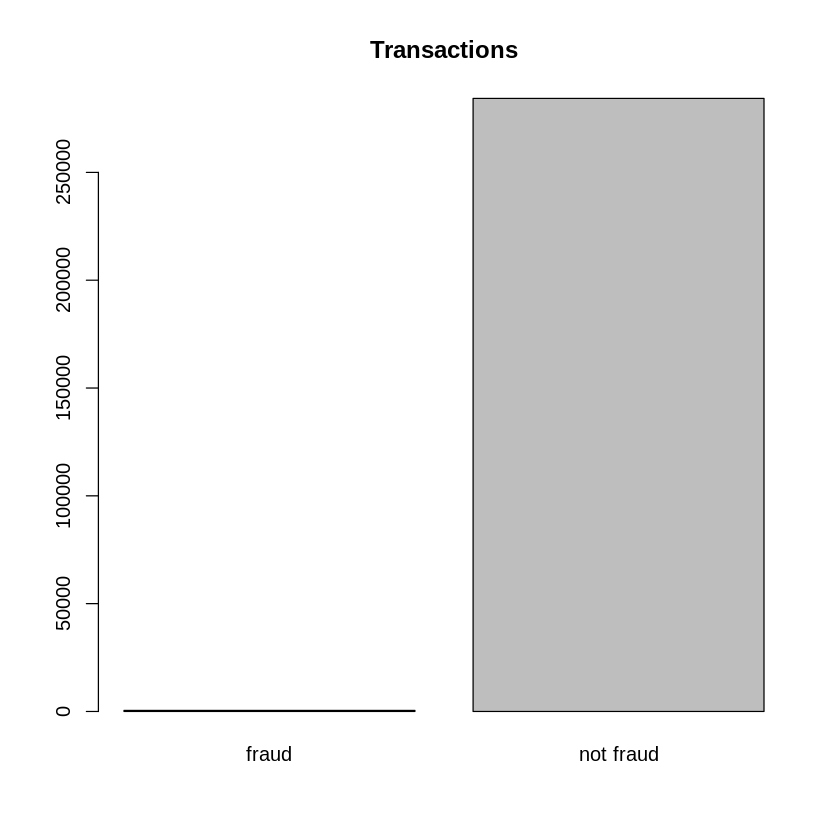

In [18]:
plot(data$Class, main = "Transactions")

Class 칼럼을 그래프로 그렸습니다. 신용카드의 부정 사용이 거의 없다는 것을 확인할 수 있습니다.

# **4. 의사결정나무 학습시키기**

#### **train 데이터, test 데이터**

모델링 하기에 앞서 데이터를 train 데이터(학습 데이터)와 test 데이터로 나누어 줍니다. caret 라이브러리에 있는 createDataPartition() 함수를 사용하여 70%는 train 데이터, 30%는 test 데이터로 분할했습니다.

In [19]:
train_idx <- createDataPartition(data$Class, p = 0.7, list = FALSE)
train_data <- data[train_idx, ]
test_data <- data[-train_idx, ]

In [20]:
prop.table(table(train_data$Class)) #train 데이터의 fraud와 not fraud의 비율 확인
prop.table(table(test_data$Class)) #test 데이터의 fraud와 not fraud의 비율 확인


      fraud   not fraud 
0.001730486 0.998269514 


      fraud   not fraud 
0.001720485 0.998279515 

#### **의사결정나무**

**의사결정나무 모델 학습**

rpart 라이브러리의 rpart()함수로 의사결정나무를 학습시켰습니다.

In [21]:
tree <- rpart(Class ~ . - Time -Class, data = train_data, method = "class")
printcp(tree)


Classification tree:
rpart(formula = Class ~ . - Time - Class, data = train_data, 
    method = "class")

Variables actually used in tree construction:
[1] V10 V12 V14 V16 V17 V26 V27

Root node error: 345/199366 = 0.0017305

n= 199366 

        CP nsplit rel error  xerror     xstd
1 0.478261      0   1.00000 1.00000 0.053792
2 0.066667      1   0.52174 0.52174 0.038871
3 0.055072      2   0.45507 0.47536 0.037104
4 0.027536      3   0.40000 0.42029 0.034890
5 0.017391      5   0.34493 0.38551 0.033417
6 0.010000      8   0.29275 0.34493 0.031610



> par(mfrow = c(1, 1), xpd = NA)\
plot(tree)\
text(tree, use.n = TRUE)

이와 같은 코드를 사용해서 의사결정나무를 시각화 할 수도 있지만, rpart.plot 라이브러리의 rpart.plot()함수를 사용하면 따로 텍스트를 입력할 필요 없이 의사결정나무를 시각화 해줍니다. 이 함수를 사용해서 의사결정나무를 그렸습니다.

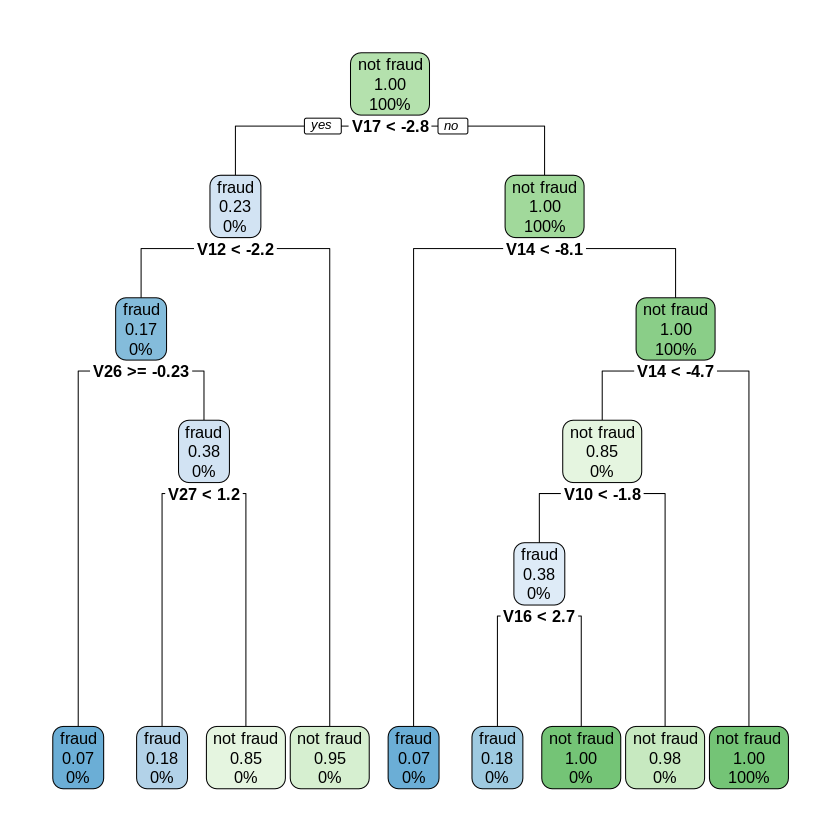

In [22]:
rpart.plot(tree) #의사결정나무 시각화

In [23]:
summary(tree)

Call:
rpart(formula = Class ~ . - Time - Class, data = train_data, 
    method = "class")
  n= 199366 

          CP nsplit rel error    xerror       xstd
1 0.47826087      0 1.0000000 1.0000000 0.05379159
2 0.06666667      1 0.5217391 0.5217391 0.03887058
3 0.05507246      2 0.4550725 0.4753623 0.03710429
4 0.02753623      3 0.4000000 0.4202899 0.03489048
5 0.01739130      5 0.3449275 0.3855072 0.03341657
6 0.01000000      8 0.2927536 0.3449275 0.03161002

Variable importance
V17 V12 V16 V10 V11 V18 V14  V7 V28  V9 V27  V3 V26  V6 
 23  18  14  12  11   9   4   1   1   1   1   1   1   1 

Node number 1: 199366 observations,    complexity param=0.4782609
  predicted class=not fraud  expected loss=0.001730486  P(node) =1
    class counts:   345 199021
   probabilities: 0.002 0.998 
  left son=2 (303 obs) right son=3 (199063 obs)
  Primary splits:
      V17 < -2.796528   to the left,  improve=360.3555, (0 missing)
      V12 < -4.559061   to the left,  improve=319.7615, (0 missing)
      

**가지치기(pruning)**

의사결정나무의 분류 기준이 많아질수록 그래프는 복잡해지며, 과적합(overfitting) 문제가 발생할 수 있습니다. 그러므로 가지치기를 이용하여 트리의 크기를 적절한 수준으로 줄입니다.

In [24]:
pruned_tree <- prune(tree, cp = 0.01739130)

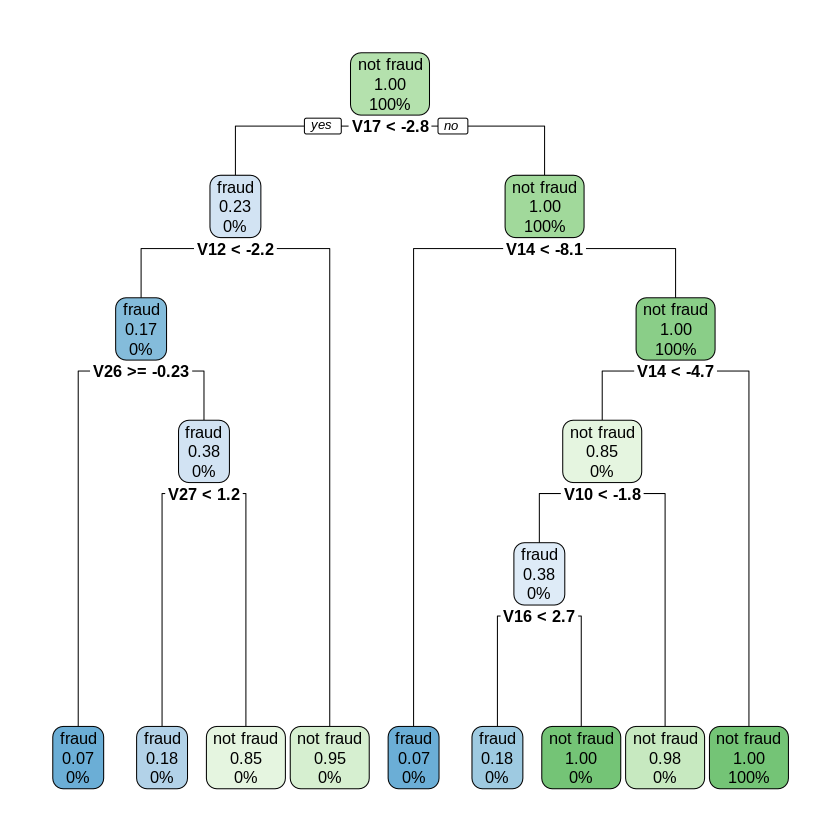

In [25]:
rpart.plot(pruned_tree) #가지치기한 의사결정나무 시각화

#### **test 데이터 예측**

**학습된 의사결정나무 모델로 test 데이터 예측**

In [26]:
pred <- predict(pruned_tree, newdata = test_data, type = "class")
pred

3         7         9        14        16        20        22        23 
not fraud not fraud not fraud not fraud not fraud not fraud not fraud not fraud 
       24        29        30        38        40        46        48        49 
not fraud not fraud not fraud not fraud not fraud not fraud not fraud not fraud 
       55        58        59        74        77        79        83        84 
not fraud not fraud not fraud not fraud not fraud not fraud not fraud not fraud 
       89        90       102       104       106       108       112       114 
not fraud not fraud not fraud not fraud not fraud not fraud not fraud not fraud 
      118       122       130       132       133       137       139       143 
not fraud not fraud not fraud not fraud not fraud not fraud not fraud not fraud 
      144       147       148       149       150       152       157       162 
not fraud not fraud not fraud not fraud not fraud not fraud not fraud not fraud 
      163       176       177       180       182       184       186       190 
not fraud not fraud not fraud not fraud not fraud not fraud not fraud not fraud 
      200       206       207       214       216       217       219       221 
not fraud not fraud not fraud not fraud not fraud not fraud not fraud not fraud 
      224       225       227       229       231       235       237       240 
not fraud not fraud not fraud not fraud not fraud not fraud not fraud not fraud 
      244       247       248       249       251       252       262       263 
not fraud not fraud not fraud not fraud not fraud not fraud not fraud not fraud 
      265       269       275       279       280       282       283       284 
not fraud not fraud not fraud not fraud not fraud not fraud not fraud not fraud 
      294       305       309       313       316       322       326       331 
not fraud not fraud not fraud not fraud not fraud not fraud not fraud not fraud 
      332       338       340       344       346       348       352       355 
not fraud not fraud not fraud not fraud not fraud not fraud not fraud not fraud 
      358       361       362       364       368       369       373       376 
not fraud not fraud not fraud not fraud not fraud not fraud not fraud not fraud 
      379       380       387       389       391       398       400       405 
not fraud not fraud not fraud not fraud not fraud not fraud not fraud not fraud 
      420       426       427       430       433       434       436       438 
not fraud not fraud not fraud not fraud not fraud not fraud not fraud not fraud 
      446       462       467       473       475       476       477       481 
not fraud not fraud not fraud     fraud not fraud not fraud not fraud not fraud 
      482       489       510       511       521       523       531       532 
not fraud not fraud not fraud not fraud not fraud not fraud not fraud not fraud 
      533       534       536       539       540       541       543       551 
not fraud not fraud not fraud not fraud not fraud not fraud not fraud not fraud 
      552       554       556       557       558       561       562       563 
not fraud not fraud not fraud not fraud not fraud not fraud not fraud not fraud 
      572       574       575       580       585       586       591       595 
not fraud not fraud not fraud not fraud not fraud not fraud not fraud not fraud 
      598       602       603       605       607       608       611       612 
not fraud not fraud not fraud not fraud not fraud not fraud not fraud not fraud 
      616       617       620       622       625       629       651       656 
not fraud not fraud not fraud not fraud not fraud not fraud not fraud not fraud 
      657       660       662       664       668       671       674       675 
not fraud not fraud not fraud not fraud not fraud not fraud not fraud not fraud 
      682       688       696       702       703       705       710       713 
not fraud not fraud not fraud not fraud

#### **의사결정나무 모델의 성능**

**혼동행렬**

In [27]:
confusionMatrix(pred, test_data$Class) #혼동행렬(confusion matirx)

Confusion Matrix and Statistics

           Reference
Prediction  fraud not fraud
  fraud       121        22
  not fraud    26     85272
                                          
               Accuracy : 0.9994          
                 95% CI : (0.9993, 0.9996)
    No Information Rate : 0.9983          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8342          
                                          
 Mcnemar's Test P-Value : 0.665           
                                          
            Sensitivity : 0.823129        
            Specificity : 0.999742        
         Pos Pred Value : 0.846154        
         Neg Pred Value : 0.999695        
             Prevalence : 0.001720        
         Detection Rate : 0.001416        
   Detection Prevalence : 0.001674        
      Balanced Accuracy : 0.911436        
                                          
       'Positive' Class : fraud           
  

confusionMatrix()함수를 사용해 의사결정나무의 성능을 확인했습니다.

혼동행렬의 대각원소는 모델에 의해 정분류된 케이스이며, 이외는 오분류라고 할 수 있습니다. 위의 행렬에서 48개가 오분류 됐음을 확인할 수 있습니다. 다음으로 정확도를 확인했습니다. 정확도는 99.94%로 매우 높으며, 정확도의 95%신뢰구간은 (0.9993, 0.9996)임을 확인할 수 있습니다.


**혼동행렬 시각화**

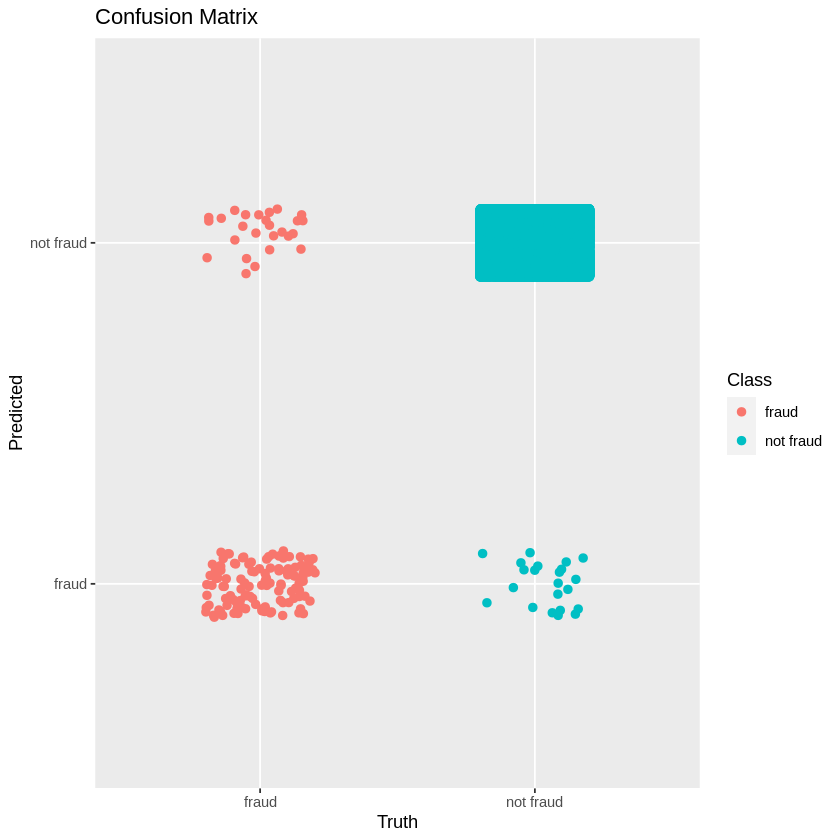

In [28]:
test_data$pred <- predict(pruned_tree, newdata = test_data, type = "class")
ggplot(test_data, aes(Class, pred, color = Class)) +
   geom_jitter(width = 0.2, height = 0.1, size = 2) +
   labs(title = "Confusion Matrix", y = "Predicted", x = "Truth")